# 🗡 Decision Boundary

This notebook demonstrates how the decision boundary is drawn based on the learned parameters.  

🔍It covers:   
- Visualizing how the decision boundary evolves at each training iteration

## 🎞 Step 4 [Hands-on]: Visualizing the Decision Boundary

### 🔧 Step 4.1: Setup

Import the required libraries.

If you're running this notebook on a new environment, make sure to install the required packages first:

```bash
pip install numpy matplotlib
```

In [1]:
# === Import the required libraries ===
import json                                 # For loading the learning history
import numpy as np                          # For numerical calculations
import matplotlib.pyplot as plt             # For plotting
import matplotlib.animation as animation    # For creating animations
from IPython.display import HTML            # For rendering animations in notebooks

# Make plots display inside Jupyter
%matplotlib inline


### 📖 Step 4.2: Load Learning History from a File

In this step, we load the saved learning history from a file in order to plot the decision boundary  
and visualize how the model learned.

In [2]:
# === Load the learning history file ===
filename = "./learning_history.json"

with open(filename, mode='r') as fd:
    data = json.load(fd)

# === Extract saved data ===
inputs  = data['inputs']
targets = data['targets']
history = data['history']

### 🎞️ Step 4.3: Create Animation of Learning Progress

Each frame shows how the decision boundary updates as the model learns.  
> This animation visualizes the evolution of the model's decision boundary over time.  
> 
> It helps illustrate how the perceptron updates its weights during training and gradually learns to classify the inputs correctly.


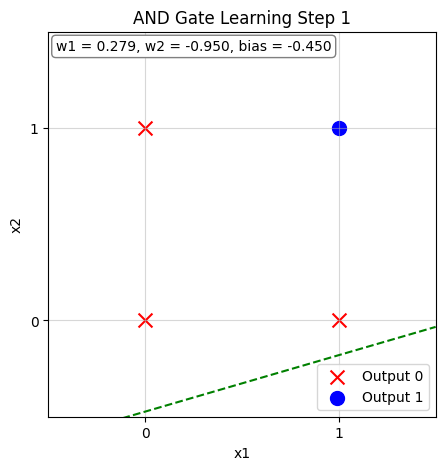

In [3]:
# === Set up the figure and axes for the animation ===
fig, ax = plt.subplots(figsize=(5, 5))

# === Function to animate each frame in the training visualization ===
def animate(i):
    # Load global data
    global inputs, targets, history
    
    # Clear the previous frame before drawing the new one
    ax.clear()
    
    # Set plot title and enable grid for this learning step
    ax.set_title(f"AND Gate Learning Step {i+1}")
    ax.grid(True, alpha=0.5)
    
    # Set axis range and label each axis
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
    # === Plot input data points with ground truth labels ===
    for training_data, target in zip(inputs, targets):
        x1, x2 = training_data
        if target == 0:
            # Red X marks samples with expected output 0
            ax.scatter(x1, x2, color='red', marker='x', s=100,
                       label='Output 0' 
                       if 'Output 0' not in ax.get_legend_handles_labels()[1] else "")
        else:
            # Blue O marks samples with expected output 1
            ax.scatter(x1, x2, color='blue', marker='o', s=100,
                       label='Output 1' 
                       if 'Output 1' not in ax.get_legend_handles_labels()[1] else "")

    # Show legend (handled automatically to avoid duplicates)
    ax.legend()
    
    
    # === Get current weights and bias from the learning history ===
    weights, bias = history[i]
    w1, w2 = weights
    
    # === Display the current weights and bias on the plot ===
    # Helps visualize how model parameters evolve during learning
    ax.text(x=0.02, y=0.98,
            s=f"w1 = {w1:.3f}, w2 = {w2:.3f}, bias = {bias:.3f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))
    
    
    # === Generate a range of x₁ values to compute the corresponding x₂ values ===
    x1_vals = np.linspace(start=-0.5, stop=1.5, num=100)
    
    # === Handle different weight configurations to draw the decision boundary ===
    # z = (w₁ * x₁) + (w₂ * x₂) + bias 
    # if z >= 0 → class 1, if z < 0 → class 0
    
    # Case 1: both weights are zero → no decision boundary
    if w1 == 0 and w2 == 0:
        ax.text(0.5, 0.5,
                "No decision boundary\n(w1 and w2 are zero)",
                color='gray', ha='center', va='center', fontsize=10, transform=ax.transAxes)
    
    # Case 2: general case (w2 ≠ 0) → diagonal or horizontal boundary
    elif w2 != 0:
        # x₂ = -(w₁ * x₁ + bias) / w₂
        x2_vals = -(w1 * x1_vals + bias) / w2
        
        # Draw the boundary only if part of it is within the visible plot area
        if np.any( (x2_vals >= -0.5) & (x2_vals <= 1.5) ):
            ax.plot(x1_vals, x2_vals, 
                    color='green', linestyle='--', label="Decision Boundary")
        else:
            ax.text(0.5, 0.5, "Boundary line out of view",
                    color='gray', ha='center', va='center', fontsize=10, transform=ax.transAxes)

    # Case 3: vertical boundary (w2 == 0 and w1 != 0)
    # → This happens when the model relies only on x₁ to make decisions
    elif w2 == 0 and w1 != 0:
        # x₁ = -bias / w₁
        x_boundary = -bias / w1
        if -0.5 <= x_boundary <= 1.5:
            ax.axvline(x_boundary, color='green', linestyle='--' ,label="Decision Boundary")
            
        else:
            ax.text(0.5, 0.5, f"Boundary x = {x_boundary:.2f} out of view",
                    color='gray', ha='center', va='center', fontsize=10, transform=ax.transAxes)

# === Create an animation using matplotlib's FuncAnimation ===
ani = animation.FuncAnimation(fig, 
                              animate, frames=len(history), interval=300, repeat=False)

#### ▶️ Step 4.3.1: Display the Learning Animation

We now display the animation that shows how the decision boundary changes over time  
as the perceptron updates its weights and bias during training.

> **📝 Note:**  
> If you're using a Jupyter environment that does not support animations,  
> consider saving the animation as a GIF using `ani.save(...)`.

In [4]:
# === Option: Save the animation as a GIF (requires Pillow library) ===
# ani.save("./animation_AND_gate_learning_steps.gif", writer='pillow')

print("▶️ Displaying Learning animation (decision boundary evolution):")
HTML(ani.to_jshtml())

▶️ Displaying Learning animation (decision boundary evolution):


End of Step 4.